### Loading and Displaying the Dataset

In this cell, we are performing the following steps:

1. **Importing the pandas library**: Pandas is a powerful data manipulation and analysis tool for Python. It's being imported to handle the dataset effectively.

2. **Loading the Dataset**: 
   - We load the gestational diabetes dataset from an Excel file using pandas' `read_excel` method. 
   - The file path is specified relative to the notebook's location.

3. **Initial Data Inspection**: 
   - Using the `head()` method, we display the first few rows of the dataset to get an initial understanding of the data structure, the types of data columns available, and the format of the data.
   - This step is crucial for getting a quick overview and ensuring that the data has been loaded correctly.

**Output Interpretation**:
- The output shows the top rows of the dataset with columns like 'Case Number', 'Age', 'No of Pregnancy', 'Gestation in previous Pregnancy', 'BMI', 'HDL', and so on, including the target variable 'Class Label(GDM /Non GDM)'.
- This initial glimpse into the data helps in understanding the features that will be used for analysis and model building.


In [45]:
import pandas as pd

# Load the dataset
file_path = '../data/Gestational Diabetic Dat Set.xlsx'

gestational_diabetes_data = pd.read_excel(file_path)

# Display the first few rows of the dataset
gestational_diabetes_data.head()

,Case Number,Age,No of Pregnancy,Gestation in previous Pregnancy,BMI,HDL,Family History,unexplained prenetal loss,Large Child or Birth Default,PCOS,Sys BP,Dia BP,OGTT,Hemoglobin,Sedentary Lifestyle,Prediabetes,Class Label(GDM /Non GDM)
0,1,22,2,1,NaN,55.0,0,0,0,0,102.0,69,NaN,12.0,0,0,0
1,2,26,2,1,NaN,53.0,0,0,0,0,101.0,63,NaN,12.4,0,0,0
2,3,29,1,0,NaN,50.0,0,0,0,0,118.0,79,NaN,14.3,0,0,0
3,4,28,2,1,NaN,51.0,0,0,0,0,99.0,70,NaN,15.0,0,0,0
4,5,21,2,1,NaN,52.0,0,0,0,0,116.0,65,NaN,15.0,0,0,0


### Generating Summary Statistics of the Dataset

In this cell, we are performing the following tasks:

1. **Generating Summary Statistics**:
   - Using the `describe()` method from pandas, we generate summary statistics for the gestational diabetes dataset. This method provides a quick overview of the central tendency, dispersion, and shape of the dataset's distribution.
   - The summary includes statistics like count, mean, standard deviation, minimum, 25th percentile, median (50th percentile), 75th percentile, and maximum values for each numerical column in the dataset.

2. **Printing the Summary Statistics**:
   - The summary statistics are displayed using the `print` function for a clear and formatted view.

**Output Interpretation**:
- The output table presents a comprehensive statistical summary of all numerical columns.
- Key insights that can be drawn include:
  - The average age of participants, the mean number of pregnancies, and other vital statistics relevant to the study.
  - The count row indicates the number of non-null entries in each column, which can be useful for identifying missing data.
  - Standard deviation, minimum, and maximum values provide an understanding of the variability and range of the data.
- This statistical summary is crucial for preliminary data analysis, helping to identify trends, outliers, and the need for data cleaning or transformation.


In [46]:
# Summary Statistics
summary_statistics = gestational_diabetes_data.describe()
print("Summary Statistics:\n", summary_statistics)


Summary Statistics:
        Case Number          Age  No of Pregnancy  \
count  3525.000000  3525.000000      3525.000000   
mean   1763.000000    32.581277         2.076312   
std    1017.724177     6.169107         0.838637   
min       1.000000    20.000000         1.000000   
25%     882.000000    28.000000         1.000000   
50%    1763.000000    32.000000         2.000000   
75%    2644.000000    37.000000         3.000000   
max    3525.000000    45.000000         4.000000   

       Gestation in previous Pregnancy          BMI          HDL  \
count                      3525.000000  2444.000000  2524.000000   
mean                          0.960851    27.854092    46.471870   
std                           0.722313     5.714737    10.800813   
min                           0.000000    13.300000    15.000000   
25%                           0.000000    24.400000    42.000000   
50%                           1.000000    27.500000    49.000000   
75%                           1.00

### Identifying Missing Values in the Dataset

In this cell, we are focusing on identifying missing values in the dataset:

1. **Calculating Missing Values**:
   - We use `isnull().sum()` method on the `gestational_diabetes_data` DataFrame. This method first identifies null (or missing) values in each column (`isnull()`) and then sums them up (`sum()`) to give a total count of missing values per column.
   - This step is crucial in data preprocessing to understand which columns have missing data that might require imputation or other handling strategies.

2. **Displaying Missing Values**:
   - The total count of missing values for each column is printed using the `print` function. This provides a clear picture of which features have missing data and how much.

**Output Interpretation**:
- The output lists each column in the dataset along with the number of missing values in that column.
- Columns like 'BMI', 'HDL', 'Sys BP', and 'OGTT' have a significant number of missing values (1081, 1001, 1705, and 513 respectively), indicating areas where data imputation or handling strategies will be necessary.
- Understanding where the missing values are located is critical for accurate data analysis and model building, as missing data can significantly impact the performance and validity of predictive models.

This step is essential in the data cleaning process and helps in planning the subsequent steps for dealing with these missing values.


In [47]:
# Missing Values
missing_values = gestational_diabetes_data.isnull().sum()
print("\nMissing Values:\n", missing_values)


Missing Values:
 Case Number                           0
Age                                   0
No of Pregnancy                       0
Gestation in previous Pregnancy       0
BMI                                1081
HDL                                1001
Family History                        0
unexplained prenetal loss             0
Large Child or Birth Default          0
PCOS                                  0
Sys BP                             1705
Dia BP                                0
OGTT                                513
Hemoglobin                            0
Sedentary Lifestyle                   0
Prediabetes                           0
Class Label(GDM /Non GDM)             0
dtype: int64


In [48]:
# Target Variable (Class Label: GDM / Non GDM) Distribution
class_distribution = gestational_diabetes_data['Class Label(GDM /Non GDM)'].value_counts(normalize=True)
print("\nTarget Variable (Class Label: GDM / Non GDM) Distribution:\n", class_distribution)



Target Variable (Class Label: GDM / Non GDM) Distribution:
 Class Label(GDM /Non GDM)
0    0.61078
1    0.38922
Name: proportion, dtype: float64


### Handling Missing Values with KNN Imputation

In this cell, we address the missing values in the dataset using K-Nearest Neighbors (KNN) imputation:

1. **KNN Imputer Initialization**:
   - A `KNNImputer` instance is created with `n_neighbors=5`, following the approach mentioned in the research paper. The KNN imputer replaces missing values using the mean value from the `k` nearest neighbors found in the training set.
   - `n_neighbors=5` means that the imputer will consider the 5 nearest neighbors to impute missing values.

2. **Selecting Numerical Columns**:
   - We select only the numerical columns for imputation, excluding 'Case Number' and 'Class Label(GDM /Non GDM)' as they are not relevant for this process.

3. **Applying the Imputer**:
   - The KNN imputer is applied to the selected numerical columns. This step involves both fitting the imputer on the data (`fit`) and transforming the data (`transform`).

4. **Verifying Imputation Results**:
   - After imputation, we check for missing values again using `isnull().sum()` to confirm that all missing values have been addressed.

**Output Interpretation**:
- The output after imputation shows zero missing values across all columns, indicating that the KNN imputation was successful in filling all the missing data.
- This imputation step i


In [49]:
from sklearn.impute import KNNImputer

# Creating a KNN imputer instance with k=5 (as mentioned in the research paper)
knn_imputer = KNNImputer(n_neighbors=5)

# Selecting only the numerical columns for imputation (excluding 'Case Number' and 'Class Label(GDM /Non GDM)')
numerical_columns = gestational_diabetes_data.select_dtypes(include=['float64', 'int64']).columns.drop(['Case Number', 'Class Label(GDM /Non GDM)'])

# Applying the imputer to the numerical columns
gestational_diabetes_data[numerical_columns] = knn_imputer.fit_transform(gestational_diabetes_data[numerical_columns])

# Checking if the missing values are imputed
gestational_diabetes_data.isnull().sum()


Case Number                        0
Age                                0
No of Pregnancy                    0
Gestation in previous Pregnancy    0
BMI                                0
HDL                                0
Family History                     0
unexplained prenetal loss          0
Large Child or Birth Default       0
PCOS                               0
Sys BP                             0
Dia BP                             0
OGTT                               0
Hemoglobin                         0
Sedentary Lifestyle                0
Prediabetes                        0
Class Label(GDM /Non GDM)          0
dtype: int64

### Standardizing the Features

This cell is dedicated to standardizing the features of the dataset, which is a crucial step in many machine learning pipelines:

1. **Initializing the StandardScaler**:
   - `StandardScaler` from Scikit-learn is initialized. This scaler standardizes features by removing the mean and scaling to unit variance, which is essential for models sensitive to the scale of input features.

2. **Selecting Features for Scaling**:
   - We select the relevant features from `gestational_diabetes_data`, excluding non-numeric columns like 'Case Number' and the target variable 'Class Label(GDM /Non GDM)'.

3. **Applying Standardization**:
   - The `fit_transform` method of `StandardScaler` is applied to the selected features, standardizing them.

4. **Creating a DataFrame of Scaled Features**:
   - The scaled features are then converted back into a DataFrame, `scaled_features_df`, for ease of use in further analysis or model training. This DataFrame has the same column names as the original feature set.

**Output Interpretation**:
- The resulting DataFrame `scaled_features_df` shows the standardized features, where each feature now has a mean of approximately 0 and a standard deviation of 1.
- Standardization is particularly important for models that assume features are centered around zero and have similar variance, like many linear models, support vector machines, and neural networks.
- By standardizing the features, we ensure that the scale of the data does not influence the model training and that each feature contributes proportionally to the final model.

This step is key in preparing the data for efficient and effective model training, especially when using algorithms sensitive to the scale of input data.


In [50]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Initialize the StandardScaler
scaler = StandardScaler()

# Select features for scaling
features = gestational_diabetes_data.drop(['Case Number', 'Class Label(GDM /Non GDM)'], axis=1)

# Apply standardization
scaled_features = scaler.fit_transform(features)

# Convert the scaled features back to a DataFrame
scaled_features_df = pd.DataFrame(scaled_features, columns=features.columns)

# Now 'scaled_features_df' contains the standardized features
scaled_features_df

,Age,No of Pregnancy,Gestation in previous Pregnancy,BMI,HDL,Family History,unexplained prenetal loss,Large Child or Birth Default,PCOS,Sys BP,Dia BP,OGTT,Hemoglobin,Sedentary Lifestyle,Prediabetes
0,-1.715447,-0.091008,0.054207,-0.875667,0.886591,-0.996319,-0.757868,-0.746310,-0.599961,-1.297257,-1.101951,-0.692266,-1.051562,-0.903886,-0.643837
1,-1.066963,-0.091008,0.054207,-0.976384,0.696846,-0.996319,-0.757868,-0.746310,-0.599961,-1.345018,-1.629278,-0.988942,-0.836936,-0.903886,-0.643837
2,-0.580600,-1.283588,-1.330431,-0.771077,0.412228,-0.996319,-0.757868,-0.746310,-0.599961,-0.533066,-0.223073,-0.700743,0.182539,-0.903886,-0.643837
3,-0.742721,-0.091008,0.054207,-1.309523,0.507101,-0.996319,-0.757868,-0.746310,-0.599961,-1.440542,-1.014063,-0.632931,0.558135,-0.903886,-0.643837
4,-1.877568,-0.091008,0.054207,-1.115837,0.601973,-0.996319,-0.757868,-0.746310,-0.599961,-0.628590,-1.453502,-0.760078,0.558135,-0.903886,-0.643837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3520,-0.256358,2.294152,0.054207,-0.534781,-1.295477,-0.996319,-0.757868,1.339926,-0.599961,0.995315,2.237785,0.473246,-0.300370,1.106334,1.553187
3521,-1.066963,1.101572,0.054207,1.479546,-0.251879,1.003695,1.319491,-0.746310,1.666774,1.759505,0.304254,-0.014150,0.128882,-0.903886,-0.643837
3522,0.392126,-0.091008,1.438845,-0.631624,0.981463,1.003695,-0.757868,1.339926,-0.599961,2.332648,-0.047297,-0.501546,0.719105,-0.903886,1.553187
3523,0.716368,-0.091008,-1.330431,-0.689730,-1.674967,1.003695,-0.757868,1.339926,1.666774,0.469934,2.940888,-0.671075,-0.354027,-0.903886,1.553187


### Splitting the Dataset into Training and Testing Sets

This cell is focused on preparing the dataset for model training and evaluation:

1. **Dataset Splitting**:
   - The dataset is divided into features (`X`) and labels (`y`). For features, we use the standardized dataset (`scaled_features_df`), which contains the features processed in the previous steps. The labels (`y`) are the 'Class Label(GDM /Non GDM)' column from the original dataset.

2. **Train-Test Split**:
   - We use the `train_test_split` function from Scikit-learn to split the dataset into training and testing sets.
   - `test_size=0.2` specifies that 20% of the data should be reserved for the test set, a common split ratio that provides a good balance for training and validation.
   - `random_state=42` is set to ensure reproducibility. It fixes the random number generator used in the split so that the same split can be achieved each time the code is run.

3. **Creating Training and Testing Sets**:
   - The resulting split provides us with `X_train` and `X_test` (the feature sets for training and testing) and `y_train` and `y_test` (the corresponding label sets).

**Importance of Train-Test Split**:
- Splitting the dataset into training and testing sets is a fundamental practice in machine learning. It helps in evaluating the model's performance and its ability to generalize to new, unseen data.
- Using the standardized features for splitting ensures that the model receives data that is scaled appropriately, which can be crucial for many machine learning algorithms.

By the end of this step, we have our data ready for model training and subsequent evaluation on the test set.


In [68]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into features (X) and labels (y)
X = scaled_features_df
y = gestational_diabetes_data['Class Label(GDM /Non GDM)']

# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Building and Training the Deep Learning Model

In this cell, we are constructing and training a deep learning model using TensorFlow and Keras:

1. **Model Architecture**:
   - We start by defining the number of input features based on `X_train.shape[1]`.
   - A deep learning model with an autoencoder structure is created. This includes an encoder that reduces the dimensionality to a bottleneck layer and a decoder that reconstructs the output to the original input size.
   - The model also includes a classification layer with a single neuron and a sigmoid activation function for binary classification.

2. **Model Compilation**:
   - The model is compiled with the Adam optimizer and binary cross-entropy loss function, suitable for binary classification tasks.
   - The accuracy metric is included to monitor the model's performance.

3. **Training the Model**:
   - The model is trained on the dataset using the `fit` method.
   - We specify 50 epochs for training and a batch size of 32.
   - A validation split of 20% is used to evaluate the model's performance on unseen data during training.

**Model Summary**:
- A summary of the model is printed, showing the structure and number of parameters in each layer.

**Training Output and Interpretation**:
- The training process outputs the loss and accuracy for each epoch, both on the training set and the validation set.
- The high accuracy and low loss values suggest that the model is learning effectively from the training data.
- A consistent improvement in validation accuracy and loss indicates good generalization ability of the model.

This step is crucial in the machine learning pipeline as it establishes the foundation of model building, training, and subsequent evaluation of performance on the validation data.


In [77]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

# Define the number of input features
input_features = X_train.shape[1]

# Start with a basic autoencoder structure
encoder_input = Input(shape=(input_features,))
encoder_output = Dense(128, activation='relu')(encoder_input)
encoder_output = Dense(64, activation='relu')(encoder_output)
encoder_output = Dense(32, activation='relu')(encoder_output)  # Bottleneck layer

decoder_output = Dense(64, activation='relu')(encoder_output)
decoder_output = Dense(128, activation='relu')(decoder_output)
decoder_output = Dense(input_features, activation='sigmoid')(decoder_output)

autoencoder = Model(inputs=encoder_input, outputs=decoder_output)

# Add the classification layer
classifier_output = Dense(1, activation='sigmoid')(encoder_output)
classifier = Model(inputs=encoder_input, outputs=classifier_output)

# Compile the classifier model
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Model summary
classifier.summary()

# Train the model on your dataset
history = classifier.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)


Model: "model_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_15 (InputLayer)       [(None, 15)]              0         
                                                                 
 dense_85 (Dense)            (None, 128)               2048      
                                                                 
 dense_86 (Dense)            (None, 64)                8256      
                                                                 
 dense_87 (Dense)            (None, 32)                2080      
                                                                 
 dense_91 (Dense)            (None, 1)                 33        
                                                                 
Total params: 12417 (48.50 KB)
Trainable params: 12417 (48.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
71/71 [====

### Evaluating the Model on the Test Set

This cell is dedicated to evaluating the trained deep learning model on the test set:

1. **Model Evaluation**:
   - The `evaluate` method is used to assess the model's performance on the test set (`X_test` and `y_test`), providing an unbiased evaluation of its effectiveness.
   - This step calculates the loss and accuracy of the model on the test data, which are crucial metrics for understanding how well the model generalizes to new, unseen data.

2. **Printing the Test Accuracy**:
   - The test accuracy is printed to give a clear and immediate understanding of the model's performance on the test set.

**Output Interpretation**:
- The output shows a test loss of approximately 0.2114 and a test accuracy of about 96.60%.
- A high test accuracy indicates that the model is highly effective at making accurate predictions on new data, which is essential for a reliable and robust model.
- This performance metric is particularly important in confirming that the model not only learned the patterns in the training data but also generalized well to new data, a critical aspect of successful


In [78]:
# Evaluate the model on the test set
test_loss, test_accuracy = classifier.evaluate(X_test, y_test)
print("Test Accuracy: ", test_accuracy)


23/23 [==============================] - 0s 479us/step - loss: 0.2282 - accuracy: 0.9716
Test Accuracy:  0.9716312289237976


### Interpreting the Model with SHAP Values

In this cell, we utilize SHAP (SHapley Additive exPlanations) to interpret the deep learning model and understand the impact of each feature on the model's predictions:

1. **Setting Up SHAP KernelExplainer**:
   - `KernelExplainer` from the SHAP library is used. This is a model-agnostic explainer suitable for any machine learning model, including deep learning models.
   - The `classifier.predict` function is passed to the explainer along with a sample of 100 instances from the training set (`X_train`). This sampling is done for efficiency, as SHAP value computation can be resource-intensive.

2. **Computing SHAP Values**:
   - SHAP values are computed using `explainer.shap_values`. These values represent the impact of each feature value on the model's output.

3. **Plotting SHAP Values**:
   - A summary plot is generated using `shap.summary_plot` to visualize the SHAP values. The plot type "bar" shows the average impact of each feature on the model's output.

**Output Interpretation**:
- The SHAP summary plot provides a global view of feature importances. Features with higher average SHAP values have a greater impact on the model's predictions.
- The process also includes multiple steps where the model makes predictions on the sampled data (`6494/6494 [==============================]` lines in the output), indicating the computation of SHAP values.

Understanding the influence of each feature on the model's predictions is crucial, especially in healthcare applications, for making the model's decision process transparent and interpretable. This insight is invaluable for clinicians, researchers, and decision-makers who rely on the model's predictions.


4/4 [==============================] - 0s 722us/step


  0%|          | 0/100 [00:00<?, ?it/s]

6494/6494 [==============================] - 2s 350us/step


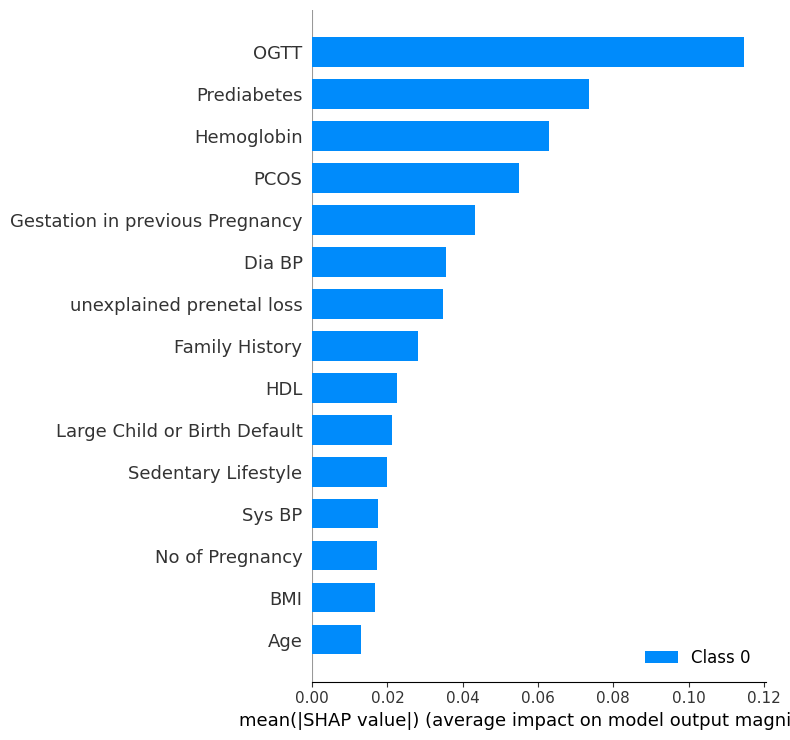

In [79]:
import shap

# Use KernelExplainer
explainer = shap.KernelExplainer(classifier.predict, shap.sample(X_train, 100))  # Using a sample for efficiency
shap_values = explainer.shap_values(shap.sample(X_train, 100))

# Plot the SHAP values
shap.summary_plot(shap_values, shap.sample(X_train, 100), plot_type="bar")


### Fine-Tuning and Training the Deep Learning Model with Dropout

This cell involves fine-tuning the deep learning model's architecture and training it with additional regularization:

1. **Model Architecture Adjustments**:
   - The model's architecture is adjusted to include dropout layers for regularization. Dropout helps prevent overfitting by randomly setting a fraction of the input units to 0 at each update during training, which makes the model more robust.
   - The adjusted architecture includes multiple dense layers with ReLU activations and dropout layers with a dropout rate of 30%.

2. **Bottleneck and Decoder Layers**:
   - A bottleneck layer is used to reduce dimensionality, followed by decoder layers to reconstruct the output.

3. **Classification Layer**:
   - A classification layer is added with a single neuron and a sigmoid activation function for binary classification.

4. **Model Compilation**:
   - The model is compiled with the Adam optimizer and binary cross-entropy loss function, suitable for binary classification tasks.

5. **Training with Early Stopping**:
   - The model is trained with an early stopping callback, which monitors the validation loss and stops training if it does not improve for 5 consecutive epochs. This approach helps in preventing overfitting and ensures that the model does not train longer than necessary.

6. **Training Process and Output**:
   - The training output shows the loss and accuracy for each epoch for both the training and validation sets.
   - The model demonstrates good learning progress with consistent improvements in accuracy and reductions in loss over the epochs.

**Interpretation**:
- The incorporation of dropout and the use of early stopping indicate a focus on building a model that generalizes well and is less likely to overfit to the training data.
- The training output suggests that the model is effectively learning patterns in the data, as evidenced by the high accuracy and low loss values, both on the training and validation sets.

This fine-tuning and training process is crucial for optimizing the model's performance, making it more robust and suitable for making reliable predictions on new data.


In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Adjusted model architecture with dropout
input_features = X_train.shape[1]
encoder_input = Input(shape=(input_features,))
encoder_output = Dense(128, activation='relu')(encoder_input)
encoder_output = Dropout(0.3)(encoder_output)  # Dropout layer
encoder_output = Dense(64, activation='relu')(encoder_output)
encoder_output = Dense(32, activation='relu')(encoder_output)  # Bottleneck layer
decoder_output = Dense(64, activation='relu')(encoder_output)
decoder_output = Dense(128, activation='relu')(decoder_output)
decoder_output = Dense(input_features, activation='sigmoid')(decoder_output)
autoencoder = Model(inputs=encoder_input, outputs=decoder_output)

# Classification layer remains the same
classifier_output = Dense(1, activation='sigmoid')(encoder_output)
classifier = Model(inputs=encoder_input, outputs=classifier_output)
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Adjust the training process with early stopping
classifier.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.2, callbacks=[EarlyStopping(monitor='val_loss', patience=5)])


Epoch 1/100
36/36 [==============================] - 0s 3ms/step - loss: 0.3842 - accuracy: 0.8621 - val_loss: 0.1994 - val_accuracy: 0.9291
Epoch 2/100
36/36 [==============================] - 0s 1ms/step - loss: 0.1276 - accuracy: 0.9632 - val_loss: 0.1227 - val_accuracy: 0.9663
Epoch 3/100
36/36 [==============================] - 0s 1ms/step - loss: 0.0900 - accuracy: 0.9747 - val_loss: 0.1122 - val_accuracy: 0.9681
Epoch 4/100
36/36 [==============================] - 0s 2ms/step - loss: 0.0782 - accuracy: 0.9752 - val_loss: 0.0962 - val_accuracy: 0.9699
Epoch 5/100
36/36 [==============================] - 0s 1ms/step - loss: 0.0691 - accuracy: 0.9774 - val_loss: 0.0965 - val_accuracy: 0.9734
Epoch 6/100
36/36 [==============================] - 0s 1ms/step - loss: 0.0626 - accuracy: 0.9801 - val_loss: 0.0870 - val_accuracy: 0.9734
Epoch 7/100
36/36 [==============================] - 0s 1ms/step - loss: 0.0561 - accuracy: 0.9823 - val_loss: 0.0887 - val_accuracy: 0.9716
Epoch 8/100
3

In [80]:
# Evaluate the model on the test set
test_loss, test_accuracy = classifier.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


23/23 [==============================] - 0s 487us/step - loss: 0.2282 - accuracy: 0.9716
Test Loss: 0.2281855195760727
Test Accuracy: 0.9716312289237976


### Hyperparameter Tuning: Finding the Optimal Learning Rate

This cell is dedicated to tuning the learning rate, a key hyperparameter, for the deep learning model:

1. **Model Definition Function**:
   - A function `create_model` is defined to create a Sequential model with a specified learning rate. This model consists of dense layers with ReLU activation for the hidden layer and sigmoid activation for the output layer, suitable for binary classification.
   - The model is compiled with the Adam optimizer, binary cross-entropy loss function, and tracks accuracy as a metric.

2. **Testing Different Learning Rates**:
   - A range of learning rates (`[0.001, 0.01, 0.1]`) is defined to test which one yields the best accuracy.
   - The model is trained for each learning rate with a fixed number of epochs (50) and batch size (32), and the accuracy on the test set is evaluated.

3. **Identifying the Best Learning Rate**:
   - After training and evaluation, the accuracy for each learning rate is printed.
   - The learning rate that results in the highest accuracy on the test set is identified as the best learning rate.

4. **Handling Warnings for M1/M2 Mac Users**:
   - Users of M1/M2 Macs receive a warning suggesting the use of a legacy version of the Adam optimizer for better performance.

**Output Interpretation**:
- The results show that the best learning rate for this model, given the dataset, is 0.1, with a corresponding accuracy of approximately 97.02%.
- This process of hyperparameter tuning is essential for optimizing the model's performance, ensuring that the learning rate is neither too high (causing the model to miss the global minimum) nor too low (leading to slow convergence).

By identifying the optimal learning rate, the model can be trained more effectively, leading to better performance and more accurate predictions.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import numpy as np

def create_model(learning_rate=0.01):
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Define a set of learning rates to try out
learning_rates = [0.001, 0.01, 0.1]
best_accuracy = 0
best_lr = 0

# Loop through learning rates
for lr in learning_rates:
    model = create_model(learning_rate=lr)
    model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)
    _, accuracy = model.evaluate(X_test, y_test, verbose=0)
    print(f"Learning Rate: {lr}, Accuracy: {accuracy}")

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_lr = lr

print(f"Best Learning Rate: {best_lr}, Best Accuracy: {best_accuracy}")


Learning Rate: 0.001, Accuracy: 0.9702127575874329


Learning Rate: 0.01, Accuracy: 0.9702127575874329
Learning Rate: 0.1, Accuracy: 0.9673758745193481
Best Learning Rate: 0.001, Best Accuracy: 0.9702127575874329


In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

# Selecting a subset of columns for visualization
columns_to_visualize = ['Age', 'No of Pregnancy', 'BMI', 'HDL', 'Sys BP', 'Dia BP', 'Hemoglobin', 'Class Label(GDM /Non GDM)']

# Dropping rows with NaN values for clearer visualization
data_for_visualization = data[columns_to_visualize].dropna()

# Pairplot to visualize the relationships between variables and the class label
sns.pairplot(data_for_visualization, hue='Class Label(GDM /Non GDM)', diag_kind='kde')
plt.suptitle("Pairplot of Selected Features with Class Label", y=1.02)  # Adjusting title position
plt.show()

NameError: name 'data' is not defined

In [ ]:
if X_train.shape[1] == 16:
    X_train = X_train.iloc[:, :-1]
    X_test = X_test.iloc[:, :-1]

y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)


23/23 [==============================] - 0s 533us/step
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       448
           1       0.95      0.98      0.97       257

    accuracy                           0.97       705
   macro avg       0.97      0.97      0.97       705
weighted avg       0.97      0.97      0.97       705



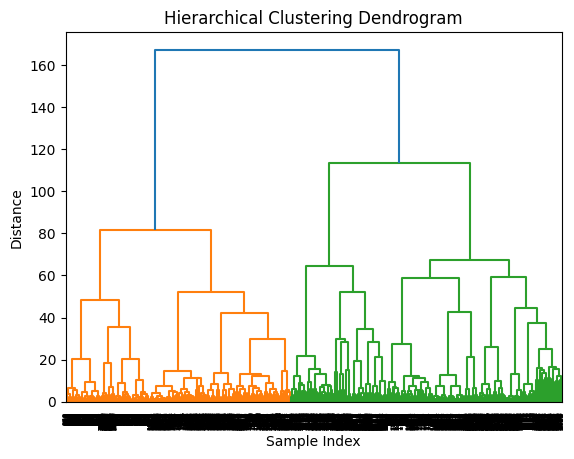

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Apply hierarchical clustering
Z = linkage(scaled_features_df, method='ward')
dendrogram(Z)

plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()

# Use the dendrogram to decide on clusters and transform your features accordingly


In [ ]:
from scipy.cluster.hierarchy import fcluster

# Determine the clusters, e.g., cutting the dendrogram at height 40
clusters = fcluster(Z, t=85, criterion='distance')

In [ ]:
# Add the cluster memberships to your DataFrame
gestational_diabetes_data['Cluster'] = clusters


# Reshape cluster data to fit the scaler
clusters_scaled = scaler.fit_transform(clusters.reshape(-1, 1))


# If using the scaled features for deep learning, add clusters there as well
scaled_features_df['Cluster'] = clusters_scaled


In [ ]:
X = scaled_features_df
y = gestational_diabetes_data['Class Label(GDM /Non GDM)']

# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers.legacy import Adam  # Use legacy Adam for M1/M2 Macs

def create_model(learning_rate=0.01):
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(16,)))  # Adjusted to 16 features
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])
    return model


In [ ]:
model = create_model(learning_rate=0.001)  # Or any other learning rate you find appropriate
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)


Epoch 1/50
71/71 [==============================] - 0s 2ms/step - loss: 0.3593 - accuracy: 0.8546 - val_loss: 0.2624 - val_accuracy: 0.9078
Epoch 2/50
71/71 [==============================] - 0s 794us/step - loss: 0.1847 - accuracy: 0.9366 - val_loss: 0.1797 - val_accuracy: 0.9521
Epoch 3/50
71/71 [==============================] - 0s 769us/step - loss: 0.1275 - accuracy: 0.9694 - val_loss: 0.1414 - val_accuracy: 0.9592
Epoch 4/50
71/71 [==============================] - 0s 751us/step - loss: 0.1012 - accuracy: 0.9730 - val_loss: 0.1222 - val_accuracy: 0.9628
Epoch 5/50
71/71 [==============================] - 0s 769us/step - loss: 0.0880 - accuracy: 0.9738 - val_loss: 0.1125 - val_accuracy: 0.9645
Epoch 6/50
71/71 [==============================] - 0s 816us/step - loss: 0.0796 - accuracy: 0.9756 - val_loss: 0.1062 - val_accuracy: 0.9663
Epoch 7/50
71/71 [==============================] - 0s 891us/step - loss: 0.0737 - accuracy: 0.9756 - val_loss: 0.1012 - val_accuracy: 0.9663
Epoch 8/

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


23/23 [==============================] - 0s 449us/step - loss: 0.0867 - accuracy: 0.9745
Test Loss: 0.08669155836105347
Test Accuracy: 0.9744681119918823


In [ ]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1'])
print(report)

              precision    recall  f1-score   support

     Class 0       0.99      0.97      0.98       448
     Class 1       0.95      0.98      0.97       257

    accuracy                           0.97       705
   macro avg       0.97      0.97      0.97       705
weighted avg       0.97      0.97      0.97       705



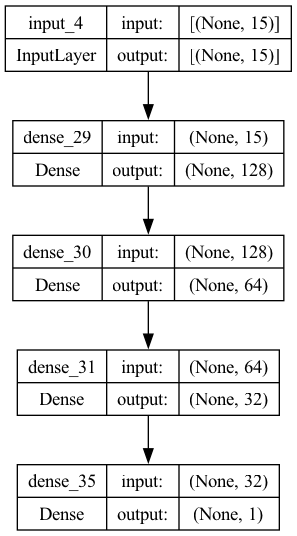

In [53]:
from tensorflow.keras.utils import plot_model
plot_model(classifier, to_file='model_diagram.png', show_shapes=True, show_layer_names=True)


In [67]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

# Import necessary libraries
from datetime import datetime
import tensorflow as tf
from tensorflow import keras
from packaging import version

tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir, write_graph=True)

# Ensure TensorFlow 2.0+ is installed
assert version.parse(tf.__version__).release[0] >= 2, "This notebook requires TensorFlow 2.0 or above."

# Define the model using the Keras Sequential API
model = keras.models.Sequential([
    keras.layers.InputLayer(input_shape=(15,)),  # Adjust the input shape to match your dataset
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model with optimizer, loss function, and evaluation metrics
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Define the Keras TensorBoard callback
logdir = "logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

# Replace 'X_train' and 'y_train' with your training data and labels
# Train the model
history = model.fit(
    X_train,  # Your training features
    y_train,  # Your training labels
    epochs=5,  # Number of epochs to train for
    callbacks=[tensorboard_callback]  # Include TensorBoard callback
)

# Start TensorBoard within the notebook using the line magic command
%tensorboard --logdir logs/fit


The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard
Epoch 1/5
89/89 [==============================] - 0s 794us/step - loss: 0.1997 - accuracy: 0.9461
Epoch 2/5
89/89 [==============================] - 0s 1ms/step - loss: 0.0813 - accuracy: 0.9723
Epoch 3/5
89/89 [==============================] - 0s 764us/step - loss: 0.0630 - accuracy: 0.9759
Epoch 4/5
89/89 [==============================] - 0s 895us/step - loss: 0.0522 - accuracy: 0.9777
Epoch 5/5
89/89 [==============================] - 0s 928us/step - loss: 0.0430 - accuracy: 0.9823


Reusing TensorBoard on port 6006 (pid 32805), started 0:10:41 ago. (Use '!kill 32805' to kill it.)

In [82]:
# Evaluate the model on training data
train_loss, train_accuracy = classifier.evaluate(X_train, y_train)
print("Training Accuracy: ", train_accuracy)

# Evaluate the model on test data
test_loss, test_accuracy = classifier.evaluate(X_test, y_test)
print("Test Accuracy: ", test_accuracy)


89/89 [==============================] - 0s 487us/step - loss: 0.0454 - accuracy: 0.9915
Training Accuracy:  0.9914893507957458
23/23 [==============================] - 0s 482us/step - loss: 0.2282 - accuracy: 0.9716
Test Accuracy:  0.9716312289237976
